<a href="https://colab.research.google.com/github/workhardzy/K6312/blob/main/topic_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/Consumer_complaints.ipynb

Exploring the data

In [ ]:
sorry from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

import pandas as pd 
import re 
import nltk 
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB


In [ ]:
path = '/content/gdrive/MyDrive/PROJECT12/1-5.xlsx' #this is from our topic models
df = pd.read_excel(path)
df

,month,topic number,topic name,title,date,topic_area
0,January,0,china coronavirus outbreak and stock market,Disease X: Mysterious outbreak in China could ...,2020-01-10 00:00:00,general
1,January,0,china coronavirus outbreak and stock market,China coronavirus outbreak: First case reporte...,2020-01-15 00:00:00,general
2,January,0,china coronavirus outbreak and stock market,Coronavirus: China reports 17 new cases of Sar...,2020-01-19 00:00:00,general
3,January,0,china coronavirus outbreak and stock market,Southeast Asia stocks: Singapore falls on Chin...,2020-01-20 00:00:00,business
4,January,0,china coronavirus outbreak and stock market,Wuhan virus: Shares of China drugmakers rise a...,2020-01-20 00:00:00,finance
...,...,...,...,...,...,...
3494,May,34,NaN,"In broadside against China, Trump moves toward...",2020-05-29 00:00:00,business
3495,May,34,NaN,NatWest launches Dream Bigger free schools ses...,2020-05-29 00:00:00,general
3496,May,34,NaN,One in six people over 50 could delay retireme...,2020-05-30 00:00:00,business
3497,May,34,NaN,Timeline: Key dates in Hong Kong's anti-govern...,2020-05-30 00:00:00,business


In [ ]:
tdf = df[['topic number','title']]
tdf

,topic number,title
0,0,Disease X: Mysterious outbreak in China could ...
1,0,China coronavirus outbreak: First case reporte...
2,0,Coronavirus: China reports 17 new cases of Sar...
3,0,Southeast Asia stocks: Singapore falls on Chin...
4,0,Wuhan virus: Shares of China drugmakers rise a...
...,...,...
3494,34,"In broadside against China, Trump moves toward..."
3495,34,NatWest launches Dream Bigger free schools ses...
3496,34,One in six people over 50 could delay retireme...
3497,34,Timeline: Key dates in Hong Kong's anti-govern...


In [ ]:
tdf.columns = ['label','title']

<Figure size 576x432 with 0 Axes>

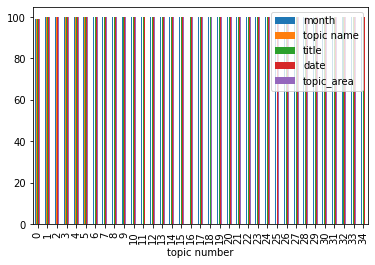

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('topic number').count().plot.bar(ylim=0) #change this
plt.show()

text preprocessing

In [ ]:
from bs4 import BeautifulSoup
import nltk
from nltk.util import ngrams
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords, wordnet
from nltk.stem import PorterStemmer
from nltk import word_tokenize
import re
import pickle


nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#to remove html tags, lemmatisation . etc etc
additional_stop_words = []                                                      

def text_cleanup(text):  
    '''
    Text pre-processing
        return a sentence of cleaned words
    '''
    text = str(text)
    #remove html tags
    text_clean = BeautifulSoup(text, "lxml").text

    ## Convert to lowercase
    text_clean = text_clean.lower()
    ##Remove non-alphabet
    text_clean = re.sub(r'[^a-zA-Z]|(\w+:\/\/\S+)',' ', text_clean)

    ##spliting into tokens
    text_clean = text_clean.split()

    ##Remove short words (length < 3)
    text_clean = [w for w in text_clean if len(w)>2]

    ##Lemmatize text ## alternative is to use stemming
    #lemmatizer = WordNetLemmatizer()
    #text_clean = [lemmatizer.lemmatize(w) for w in text_clean]
    
    #ps = PorterStemmer()
    #text_clean = [ps.stem(w) for w in text_clean]
    
    ## Filter out stop words in English 
    stops = set(stopwords.words('english')).union(additional_stop_words)
    text_clean = [w for w in text_clean if w not in stops]
    
    #joining the list into a sentence
    mySeparator = " "
    text_clean = mySeparator.join(text_clean)


    return text_clean

txt = r"This movie is not based on the bible. It completely leaves Christ out of the movie. They do not show the rapture or the second coming of Christ. Let alone talk about it. It does not quote from scriptures. The end times are called the great tribulation. The movie does not even show bad times. The seven bowls, seven viles and seven trumpets of judgements are boiled down to a 15 second news cast of the sea changing it's structure. The anti-Christ was killed 3 1/2 years into the tribulation and that is how the movie ended. The only part they got correct was there was two prophets. The did not use there names of course because that would be too close to the truth of scriptures. The worst part of it was I really wanted it to be a good movie. I wanted to take unsaved people to it. I feel that the movie is evil. It is a counterfeit just like everything the devil does. I just hope it does not take away from the upcoming movie based on the left behind books.<br /><br />The second problem with the movie is it was just bad. Bad acting, bad special effects, bad plot and poor character development. I have seen better episodes of Miami vice."
print('ORIGINAL','\n', txt)
text_cleanup(txt)

ORIGINAL 
 This movie is not based on the bible. It completely leaves Christ out of the movie. They do not show the rapture or the second coming of Christ. Let alone talk about it. It does not quote from scriptures. The end times are called the great tribulation. The movie does not even show bad times. The seven bowls, seven viles and seven trumpets of judgements are boiled down to a 15 second news cast of the sea changing it's structure. The anti-Christ was killed 3 1/2 years into the tribulation and that is how the movie ended. The only part they got correct was there was two prophets. The did not use there names of course because that would be too close to the truth of scriptures. The worst part of it was I really wanted it to be a good movie. I wanted to take unsaved people to it. I feel that the movie is evil. It is a counterfeit just like everything the devil does. I just hope it does not take away from the upcoming movie based on the left behind books.<br /><br />The second prob

'movie based bible completely leaves christ movie show rapture second coming christ let alone talk quote scriptures end times called great tribulation movie even show bad times seven bowls seven viles seven trumpets judgements boiled second news cast sea changing structure anti christ killed years tribulation movie ended part got correct two prophets use names course would close truth scriptures worst part really wanted good movie wanted take unsaved people feel movie evil counterfeit like everything devil hope take away upcoming movie based left behind books second problem movie bad bad acting bad special effects bad plot poor character development seen better episodes miami vice'

In [ ]:
X = tdf['title'].fillna('').tolist()
X = [str(i) for i in X]
y = tdf['label'].fillna('').tolist()

RANDOM_STATE = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=RANDOM_STATE)


In [ ]:
from tqdm.notebook import tqdm
#for text preprocessing #you can run without doing so

#doing list comprehension
X_train = [text_cleanup(txt) for txt in tqdm(X_train)]
X_test = [text_cleanup(txt) for txt in tqdm(X_test)]

In [ ]:
#vectorising
#do use tfidf if you think it helps
#if need be, can try to use word embeddings

from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer() 
X_train = count_vect.fit_transform(X_train)
X_test = count_vect.transform(X_test)


In [ ]:
#confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc

def show_confusion_matrix(confusion_matrix):
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.ylabel('Truth')
  plt.xlabel('Predicted');

Model training

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# fitting naive bayes to the training set 
 
model = MultinomialNB()
%time model.fit(X_train, y_train) 
  
# predicting test set results 
y_pred = model.predict(X_test) 
  
print(classification_report(y_test, y_pred))

CPU times: user 9.64 ms, sys: 3 ms, total: 12.6 ms
Wall time: 18.5 ms
              precision    recall  f1-score   support

           0       0.33      0.59      0.43        46
           1       0.20      0.24      0.21        51
           2       0.56      0.62      0.59        58
           3       0.23      0.48      0.31        48
           4       0.38      0.31      0.34        54
           5       0.59      0.32      0.41        53
           6       0.45      0.25      0.32        53
           7       0.28      0.57      0.37        44
           8       0.30      0.34      0.32        50
           9       0.51      0.75      0.61        48
          10       0.41      0.33      0.36        55
          11       0.42      0.35      0.38        49
          12       0.44      0.55      0.49        51
          13       0.44      0.42      0.43        50
          14       0.48      0.25      0.33        56
          15       0.38      0.50      0.43        50
          1

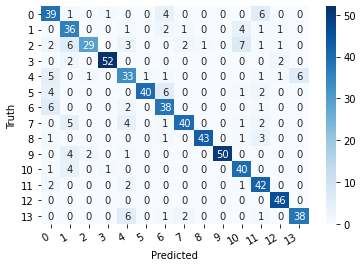

In [ ]:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm)
show_confusion_matrix(df_cm)

In [ ]:
filename = '/content/gdrive/My Drive/covid_mining/NB_topic_class_model.h5'
pickle.dump(model, open(filename, 'wb'))

dataset *labelling* with classifier

In [ ]:
def label_text(text,model,vect):
    text = vect.transform([text])
    return model.predict(text).flatten()[0]

def label_prob(text,model,vect):
    text = vect.transform([text])
    return model.predict_proba(text).flatten()

In [ ]:
tqdm.pandas()

news_df = pd.read_csv('/content/gdrive/My Drive/covid_mining/covid19_articles_20200914.csv').drop(['Unnamed: 0'],axis=1)
news_df['predicted']  = news_df['title'].progress_apply(lambda x: label_text(x,model,count_vect))
news_df

,title,url,crawled_time,date,domain,author,content,topic_area,predicted
0,Three Industrial Giants You Should Own In 2020,https://www.marketbeat.com/originals/three-ind...,2020-05-19,2020-01-02,marketbeat,Thomas Hughes,"Posted on Thursday, January 2nd, 2020 by Thoma...",business,4
1,"Tesla (TSLA) Breaks Shipment Record, Beats Est...",https://www.marketbeat.com/originals/teal-brea...,2020-05-19,2020-01-03,marketbeat,Steve Anderson,"It could be forgiven, that some might think th...",business,4
2,Labor Stocks Are Going To Break Out In 2020,https://www.marketbeat.com/originals/labor-sto...,2020-05-19,2020-01-03,marketbeat,Thomas Hughes,"Posted on Friday, January 3rd, 2020 by Thomas ...",business,7
3,Cal-Maine Just Shed 12% - But Is Now The Time ...,https://www.marketbeat.com/originals/cal-maine...,2020-05-19,2020-01-06,marketbeat,Thomas Hughes,"Posted on Monday, January 6th, 2020 by Thomas ...",business,1
4,"China pneumonia outbreak: It's not SARS, so wh...",https://www.edition.cnn.com/2020/01/06/health/...,2020-06-22,2020-01-06,edition.cnn,"Nectar Gan, CNN",A total of 59 cases of unknown viral pneumonia...,business,12
...,...,...,...,...,...,...,...,...,...
290474,"Trump signs new, expanded executive order to l...",https://finance.yahoo.com/news/trump-signs-exp...,2020-09-14,2020-09-14,finance.yahoo,NaN,WASHINGTON (Reuters) - President Donald Trump ...,business,4
290475,Nuggets force Game 7 and D'Antoni leaves HOU,https://finance.yahoo.com/news/nuggets-force-g...,2020-09-14,2020-09-14,finance.yahoo,NaN,After the Lakers knocked out the Rockets in fi...,business,4
290476,Health Official Out To Manipulate CDC Reports ...,https://finance.yahoo.com/news/michael-caputo-...,2020-09-14,2020-09-14,finance.yahoo,NaN,The Health and Human Services official who has...,business,9
290477,Global Markets: Asian shares buoyed by coronav...,https://finance.yahoo.com/news/global-markets-...,2020-09-14,2020-09-14,finance.yahoo,NaN,By Swati Pandey SYDNEY (Reuters) - Asian share...,business,4


In [ ]:
news_df['predicted_probability']  = news_df['title'].progress_apply(lambda x: label_prob(x,model,count_vect))


In [ ]:
#attaching label
path = '/content/gdrive/MyDrive/covid_mining/Selected/topic_classification.xlsx' #this is from our topic models
df = pd.read_excel(path)
tdf = df[['topic number','topic name']].drop_duplicates()
tdf.columns = ['predicted','topic_label']
tdf

,predicted,topic_label
0,0,oil price and coronavirus update
100,1,"stock market,face masks and"
200,2,"Due to covid crisis,people began to work from ..."
300,3,hedge fund
400,4,economic recovery and the test of Trump's sta...
500,5,financial statement
600,6,New York Stock Exchange and gold price
700,7,the impact of the virus on Hong Kong
800,8,"white house, clinical trial and jobless claims..."
900,9,the impact of covid vaccine on Asia stock and ...


In [ ]:
dd = pd.merge(news_df,tdf,on='predicted')

In [ ]:
dd.predicted.value_counts()

0     35460
4     33143
11    32997
1     31176
2     23562
6     22109
10    19446
13    16377
8     15252
3     13673
12    13606
7     13049
5     11078
9      9551
Name: predicted, dtype: int64

In [ ]:
#exporting to csv
pd.merge(news_df,tdf,on='predicted').to_csv('/content/gdrive/MyDrive/covid_mining/Selected/topic_labelled.csv')